***MEMILIH DATASET***

Pada Tugas decision tree ini menggunakan dataset Drug
Mengapa demikian?
Ada beberapa alasan mengapa dataset ini dipilih, diantaranya adalah:
1. Ukuran dataset kecil yakni sekitar 200 sampel data hal ini membuat data menjadi lebih mudah dianalisis namun ukuran dataset yang relatif kecil tidak hanya membuat decision dataset ini menjadi spesifik. Ada kemungkinan dataset ini menjadi overfitting.
2. keakuratan tinggi, dimana dataset dianggap berdistribusi seimbang mengingat ukuran dataset yang kecil sehingga memiliki target yang mudah diprediksi dan jelas data ini lebih praktis.

Adapun langkah-langkah melakukan decision tree pada dataset drug ini adalah sebagai berikut:

Import Library yang diperlukan

In [1]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from yellowbrick.classifier import ROCAUC, ClassificationReport, ConfusionMatrix

In [6]:
# Memuat data dari file CSV
df = pd.read_csv('/content/drive/MyDrive/Decision-Tree/drug200.csv')
# Menampilkan 5 baris pertama dari dataset
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


Dataset ini berisi informasi mengenai pasien dan obat yang diresepkan. Berikut adalah penjelasan mengenai fitur-fitur, atribut relevan, dan variabel target yang ada dalam data:

1. Fitur Relevan:
   - Age: Usia pasien (numerik), yang dapat memengaruhi jenis obat yang dibutuhkan.
   - Sex: Jenis kelamin pasien (kategori: 'M' atau 'F').
   - BP: Tekanan darah pasien (kategori: 'LOW', 'NORMAL', 'HIGH'), kemungkinan berkaitan dengan jenis obat.
   - Cholesterol: Tingkat kolesterol pasien (kategori: 'NORMAL' atau 'HIGH'), mungkin memengaruhi pilihan obat.
   - Na_to_K: Rasio natrium terhadap kalium dalam tubuh pasien (numerik), yang bisa jadi faktor penting dalam menentukan resep obat.

2. Variabel Target:
   - Drug: Obat yang diresepkan (kategori), yang menjadi variabel target dalam model klasifikasi. Variabel ini menunjukkan jenis obat yang diresepkan berdasarkan kondisi kesehatan pasien.

# ***MELAKUKAN PREPROCESSING DATA***


**A. Memeriksa Missing Value**

In [8]:
# Menampilkan jumlah missing values
missing_values = df.isnull().sum()
print("\nJumlah Missing Values per Kolom:")
print(missing_values)


Jumlah Missing Values per Kolom:
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


**B. Menampilkan Informasi dataset**

In [9]:
# Menampilkan Informasi Data
print("\nInformasi dataset:")
print(df.info())


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


Berdasarkan informasi yang diberikan mengenai dataset, berikut adalah interpretasi rinci tentang struktur dan tipe data yang ada:

1. **Jumlah Data**:  
   Dataset ini memiliki **200 baris** data, yang terindeks dari 0 hingga 199.

2. **Kolom-kolom dalam Dataset**:  
   Dataset terdiri dari 6 kolom dengan berbagai jenis tipe data:
   - **Age**: Kolom ini berisi data umur pasien, dengan tipe data **integer** (`int64`). Terdapat 200 nilai non-null yang berarti tidak ada data yang hilang untuk kolom ini.
   - **Sex**: Kolom ini berisi informasi tentang jenis kelamin pasien, dengan tipe data **object** (string atau kategori). Semua 200 nilai adalah non-null.
   - **BP (Blood Pressure)**: Kolom ini menggambarkan kategori tekanan darah pasien, dengan tipe data **object**. Kolom ini juga berisi 200 nilai non-null, yang berarti tidak ada nilai yang hilang.
   - **Cholesterol**: Kolom ini berisi kategori kadar kolesterol pasien, juga dengan tipe data **object**. Tidak ada nilai yang hilang di kolom ini.
   - **Na_to_K**: Kolom ini berisi rasio antara kadar natrium dan kalium dalam darah pasien, dengan tipe data **float64**. Semua nilai dalam kolom ini juga tidak ada yang hilang (200 non-null).
   - **Drug**: Kolom ini menyimpan label jenis obat yang diberikan kepada pasien, dengan tipe data **object**. Tidak ada nilai yang hilang di kolom ini.

3. **Tipe Data**:  
   - **int64**: Tipe data untuk kolom "Age", yang menunjukkan bahwa data pada kolom ini adalah bilangan bulat.
   - **float64**: Tipe data untuk kolom "Na_to_K", yang menunjukkan bahwa data pada kolom ini adalah bilangan pecahan (desimal).
   - **object**: Tipe data untuk kolom "Sex", "BP", "Cholesterol", dan "Drug", yang menunjukkan bahwa kolom ini berisi data berupa string atau kategori.

4. **Penggunaan Memori**:  
   Dataset ini menggunakan sekitar **9.5 KB** memori. Ini menunjukkan bahwa dataset relatif kecil, mengingat hanya terdiri dari 200 entri dan 6 kolom.

5. **Tidak Ada Nilai yang Hilang**:  
   Semua kolom dalam dataset ini berisi data lengkap, dengan tidak ada nilai yang hilang (Non-Null Count semuanya 200). Hal ini berarti bahwa dataset siap untuk diproses lebih lanjut tanpa perlu mengatasi masalah data yang hilang.

Secara keseluruhan, dataset ini memiliki struktur yang sederhana dengan 6 kolom, 5 di antaranya berisi data kategorikal (seperti jenis kelamin, tekanan darah, kolesterol, dan jenis obat) yang perlu diproses untuk analisis lebih lanjut, sementara satu kolom (Na_to_K) berisi data numerik. Semua data dalam dataset ini lengkap dan tidak ada data yang hilang.

**C. Transformasi Variabel Kategorik dan Normalisasi Fitur**

In [20]:
# Periksa distribusi data untuk setiap variabel kategorik
print("\nDistribusi Kategori:")
for col in ['Sex', 'BP', 'Cholesterol', 'Drug']:
    print(f"\nDistribusi pada {col}:")
    print(df[[col]].value_counts())

# Visualisasi distribusi dari variabel kategorik
for col in ['Sex', 'BP', 'Cholesterol']:
    fig = px.histogram(df, x=col, color='Drug',barmode='group',
                       title=f'Distribusi {col} Berdasarkan Kategori Obat')
    fig.show()

# --- Transformasi Variabel Kategorik ---
# Inisialisasi LabelEncoder
le = LabelEncoder()

# Mengubah variabel kategorik menjadi numerik dan menyimpan mapping
categorical_features = ['Sex', 'BP', 'Cholesterol', 'Drug']
mappings = {}
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])
    mappings[feature] = dict(zip(le.classes_, le.transform(le.classes_)))

# --- Normalisasi Fitur ---
# Impor MinMaxScaler dari sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi fitur numerik (Age dan Na_to_K)
numerical_features = ['Age', 'Na_to_K']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Menampilkan data yang telah ditransformasi
print("\nData yang telah ditransformasi:")
print(df.head())

# --- Mencetak Keterangan ---
print("Keterangan Kolom:")
for feature in categorical_features:
    print(f"\n{feature}:")
    for label, value in mappings[feature].items():
        print(f"  {value} : {label}")


Distribusi Kategori:

Distribusi pada Sex:
Sex
1      104
0       96
Name: count, dtype: int64

Distribusi pada BP:
BP
0     77
1     64
2     59
Name: count, dtype: int64

Distribusi pada Cholesterol:
Cholesterol
0              103
1               97
Name: count, dtype: int64

Distribusi pada Drug:
Drug
4       91
3       54
0       23
1       16
2       16
Name: count, dtype: int64



Data yang telah ditransformasi:
        Age  Sex  BP  Cholesterol   Na_to_K  Drug
0  0.135593    0   0            0  0.596848     4
1  0.542373    1   1            0  0.213397     2
2  0.542373    1   1            0  0.120239     2
3  0.220339    0   2            0  0.047814     3
4  0.779661    0   1            0  0.368191     4
Keterangan Kolom:

Sex:
  0 : 0
  1 : 1

BP:
  0 : 0
  1 : 1
  2 : 2

Cholesterol:
  0 : 0
  1 : 1

Drug:
  0 : 0
  1 : 1
  2 : 2
  3 : 3
  4 : 4


1. Menggunakan **value_counts()** untuk memeriksa distribusi setiap variabel kategorik (kolom Sex, BP, Cholesterol, Drug) dalam dataset.
2. Menggunakan **plotly.express.histogram()** untuk memvisualisasikan distribusi variabel kategorik Sex, BP, dan Cholesterol, dengan pemisahan warna berdasarkan kategori obat (Drug).
3. **LabelEncoder** digunakan untuk mengubah nilai kategorikal dalam kolom Sex, BP, Cholesterol, dan Drug menjadi angka, yang akan memudahkan pemodelan machine learning yang membutuhkan input numerik.
4.**mappings** dibuat untuk menyimpan hubungan antara kategori asli dan nilai numerik yang baru, yang berguna untuk menginterpretasi kembali data yang telah diubah.
5. Menggunakan **MinMaxScaler** untuk menormalisasi dua fitur numerik, yaitu Age dan Na_to_K, sehingga nilainya berada dalam rentang [0, 1].
6. Menampilkan lima baris pertama dataset setelah transformasi dilakukan, yaitu setelah variabel kategorik diubah menjadi numerik dan fitur numerik dinormalisasi.
7. Menampilkan keterangan untuk setiap kolom kategorikal mengenai bagaimana kategori tersebut diubah menjadi nilai numerik. Ini memberikan informasi tentang mapping yang diterapkan oleh LabelEncoder.


### ***EXPLORATORY DATA ANALYSIS (EDA)***

**1. Statistik Deskriptif**

In [22]:
import pandas as pd

# Memuat data
df = pd.read_csv('/content/drive/MyDrive/Decision-Tree/drug200.csv')

# --- Statistik Deskriptif ---
print("Statistik Deskriptif Dataset:")
print(df.describe(include='all'))  # Menampilkan statistik untuk semua kolom

Statistik Deskriptif Dataset:
               Age  Sex    BP Cholesterol     Na_to_K   Drug
count   200.000000  200   200         200  200.000000    200
unique         NaN    2     3           2         NaN      5
top            NaN    M  HIGH        HIGH         NaN  drugY
freq           NaN  104    77         103         NaN     91
mean     44.315000  NaN   NaN         NaN   16.084485    NaN
std      16.544315  NaN   NaN         NaN    7.223956    NaN
min      15.000000  NaN   NaN         NaN    6.269000    NaN
25%      31.000000  NaN   NaN         NaN   10.445500    NaN
50%      45.000000  NaN   NaN         NaN   13.936500    NaN
75%      58.000000  NaN   NaN         NaN   19.380000    NaN
max      74.000000  NaN   NaN         NaN   38.247000    NaN


Untuk menghilangkan NaN pada statistik deskriptif maka pisahkan kolom numerik dan kategorik atau statistik deskriptif terpisah:

> - Statistik Deskriptif Kolom Numerik: Tabel ini akan berisi statistik yang relevan untuk data numerik (mean, std, min, max, dll.) tanpa nilai NaN.
- Statistik Deskriptif Kolom Kategorik: Tabel ini akan berisi statistik yang relevan untuk data kategorikal (count, unique, top, freq) tanpa nilai NaN.

In [24]:
import pandas as pd

# Memuat data
df = pd.read_csv('/content/drive/MyDrive/Decision-Tree/drug200.csv')

# --- Pisahkan Kolom Numerik dan Kategorik ---
numerical_features = ['Age', 'Na_to_K']
categorical_features = ['Sex', 'BP', 'Cholesterol', 'Drug']

df_numerical = df[numerical_features]
df_categorical = df[categorical_features]

# --- Statistik Deskriptif ---
print("Statistik Deskriptif Kolom Numerik:")
print(df_numerical.describe())  # Statistik untuk kolom numerik

print("\nStatistik Deskriptif Kolom Kategorik:")
print(df_categorical.describe(include='all'))  # Statistik untuk kolom kategorik

Statistik Deskriptif Kolom Numerik:
              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000

Statistik Deskriptif Kolom Kategorik:
        Sex    BP Cholesterol   Drug
count   200   200         200    200
unique    2     3           2      5
top       M  HIGH        HIGH  drugY
freq    104    77         103     91


In [28]:
# --- Statistik Deskriptif Setelah Transformasi ---
print("Statistik Deskriptif Setelah Transformasi:")
print(df.describe(include='all'))  # Menampilkan statistik untuk semua kolom


Statistik Deskriptif Setelah Transformasi:
              Age         Sex          BP  Cholesterol     Na_to_K        Drug
count  200.000000  200.000000  200.000000   200.000000  200.000000  200.000000
mean     0.496864    0.520000    0.910000     0.485000    0.306945    2.870000
std      0.280412    0.500854    0.821752     0.501029    0.225904    1.372047
min      0.000000    0.000000    0.000000     0.000000    0.000000    0.000000
25%      0.271186    0.000000    0.000000     0.000000    0.130605    2.000000
50%      0.508475    1.000000    1.000000     0.000000    0.239774    3.000000
75%      0.728814    1.000000    2.000000     1.000000    0.410001    4.000000
max      1.000000    1.000000    2.000000     1.000000    1.000000    4.000000


Menampilkan hubungan antara BP, Sex, dan Cholesterol terhadap Drug sebelum dan setelah transformasi dengan dua metode, yaitu:
- Membuat tabel kontingensi dengan **memisahkan** setiap variabel kategorik secara terpisah.
- Membuat tabel kontingensi dengan **menggabungkan** seluruh variabel kategorik dalam satu tabel.

In [30]:
# ... (Kode transformasi dan normalisasi dari langkah sebelumnya) ...
# --- Membuat tabel kontingensi sebelum transformasi ---
df_original = pd.read_csv('/content/drive/MyDrive/Decision-Tree/drug200.csv')
drug_counts_original = pd.crosstab(df_original['BP'], df_original['Drug'])
print("\nHubungan antara BP dan Drug (sebelum transformasi):")
print(drug_counts_original)

drug_counts_original = pd.crosstab(df_original['Sex'], df_original['Drug'])
print("\nHubungan antara BP dan Drug (sebelum transformasi):")
print(drug_counts_original)

drug_counts_original = pd.crosstab(df_original['Cholesterol'], df_original['Drug'])
print("\nHubungan antara BP dan Drug (sebelum transformasi):")
print(drug_counts_original)


# --- Membuat tabel kontingensi setelah transformasi ---
drug_counts_transformed = pd.crosstab(df['BP'], df['Drug'])
print("\nHubungan antara BP dan Drug (setelah transformasi):")
print(drug_counts_transformed)

drug_counts_transformed = pd.crosstab(df['Sex'], df['Drug'])
print("\nHubungan antara Sex dan Drug (setelah transformasi):")
print(drug_counts_transformed)

drug_counts_transformed = pd.crosstab(df['Cholesterol'], df['Drug'])
print("\nHubungan antara Cholesterol dan Drug (setelah transformasi):")
print(drug_counts_transformed)

# b. Hubungan antara variabel kategorik dan variabel target (menggunakan crosstab)
for feature in categorical_features[:-1]:  # Exclude 'Drug' (target)
    drug_counts = pd.crosstab(df[feature], df['Drug'])
    print(f"\nHubungan antara {feature} dan Drug:")
    print(drug_counts)




Hubungan antara BP dan Drug (sebelum transformasi):
Drug    drugA  drugB  drugC  drugX  drugY
BP                                       
HIGH       23     16      0      0     38
LOW         0      0     16     18     30
NORMAL      0      0      0     36     23

Hubungan antara BP dan Drug (sebelum transformasi):
Drug  drugA  drugB  drugC  drugX  drugY
Sex                                    
F         9      6      7     27     47
M        14     10      9     27     44

Hubungan antara BP dan Drug (sebelum transformasi):
Drug         drugA  drugB  drugC  drugX  drugY
Cholesterol                                   
HIGH            12      8     16     20     47
NORMAL          11      8      0     34     44

Hubungan antara BP dan Drug (setelah transformasi):
Drug   0   1   2   3   4
BP                      
0     23  16   0   0  38
1      0   0  16  18  30
2      0   0   0  36  23

Hubungan antara Sex dan Drug (setelah transformasi):
Drug   0   1  2   3   4
Sex                    
0  

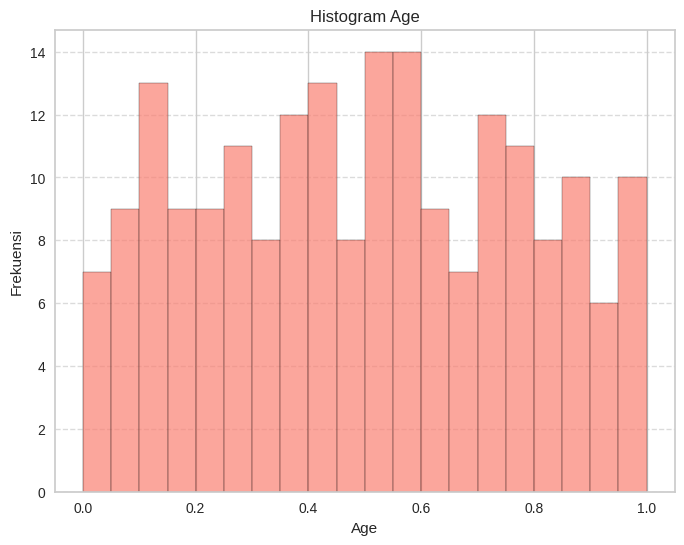

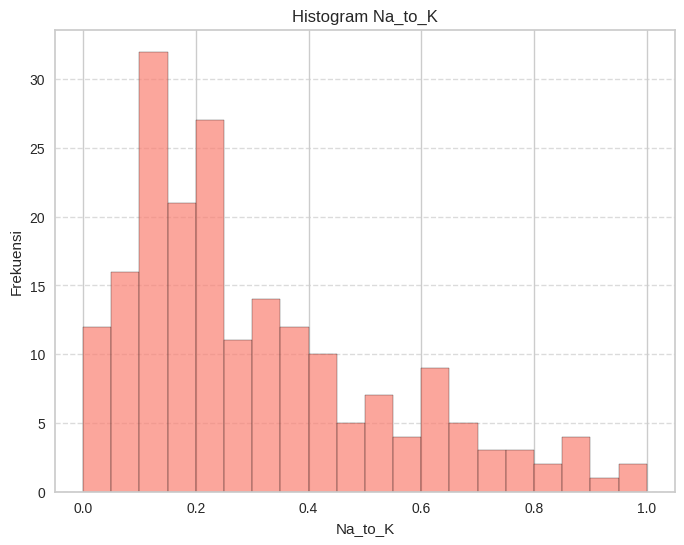

In [39]:
# --- Visualisasi Data ---
import matplotlib.pyplot as plt

# Visualisasi Histogram untuk Fitur Numerik
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature], bins=20, color='salmon', edgecolor='black', alpha=0.7)
    plt.title(f'Histogram {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


Histogram ini digunakan untuk menganalisis sebaran data dan memahami karakteristik distribusi data numerik, seperti apakah data terdistribusi normal, apakah ada pencilan, atau apakah ada nilai yang sangat mendominasi.

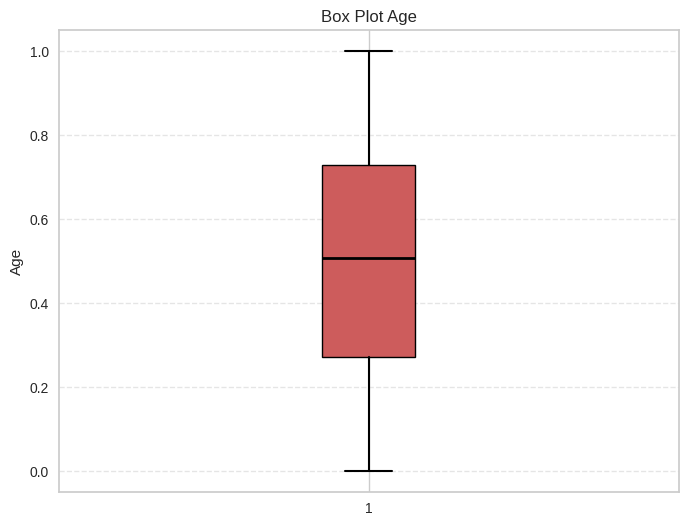

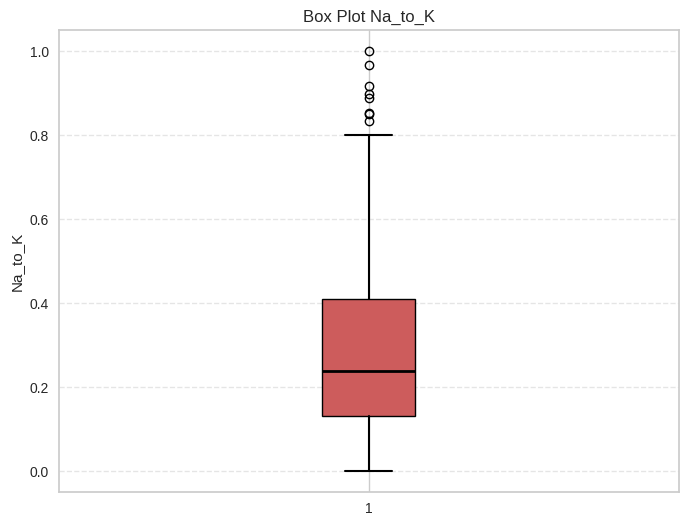

In [45]:
import matplotlib.pyplot as plt

# Visualisasi Box Plot untuk Fitur Numerik
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[feature], patch_artist=True,
                boxprops=dict(facecolor='indianred', color='black'),
                medianprops=dict(color='black', linewidth=2),
                whiskerprops=dict(color='black', linewidth=1.5),
                capprops=dict(color='black', linewidth=1.5))
    plt.title(f'Box Plot {feature}')
    plt.ylabel(feature)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()


Box plot digunakan untuk memvisualisasikan penyebaran data dan mendeteksi pencilan (outliers). Dalam konteks ini, box plot akan menunjukkan bagaimana distribusi data pada fitur numerik Age dan Na_to_K, apakah data terdistribusi secara simetris, apakah ada pencilan yang signifikan, dan seberapa besar rentang nilai dalam fitur tersebut.

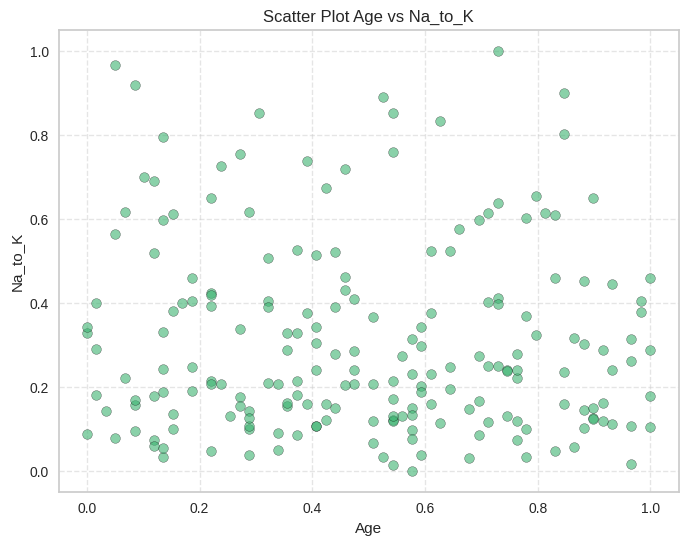

In [48]:
# Scatter Plot untuk Hubungan Antar Fitur Numerik
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Na_to_K'], color='mediumseagreen', alpha=0.6, edgecolor='black')
plt.title('Scatter Plot Age vs Na_to_K')
plt.xlabel('Age')
plt.ylabel('Na_to_K')
plt.grid(linestyle='--', alpha=0.5)
plt.show()



Scatter plot ini digunakan untuk mengeksplorasi hubungan antara usia (Age) dan rasio natrium terhadap kalium (Na_to_K). Dengan melihat visualisasi ini, kita bisa mendapatkan gambaran apakah kedua fitur ini saling berhubungan atau tidak, dan apakah ada pola yang signifikan yang perlu dipertimbangkan dalam analisis data lebih lanjut.

<ipython-input-50-d8bc15104a6c>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




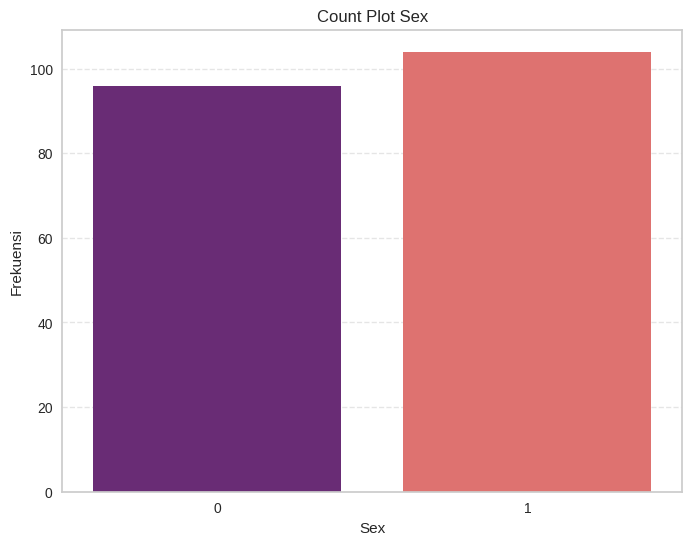

<ipython-input-50-d8bc15104a6c>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




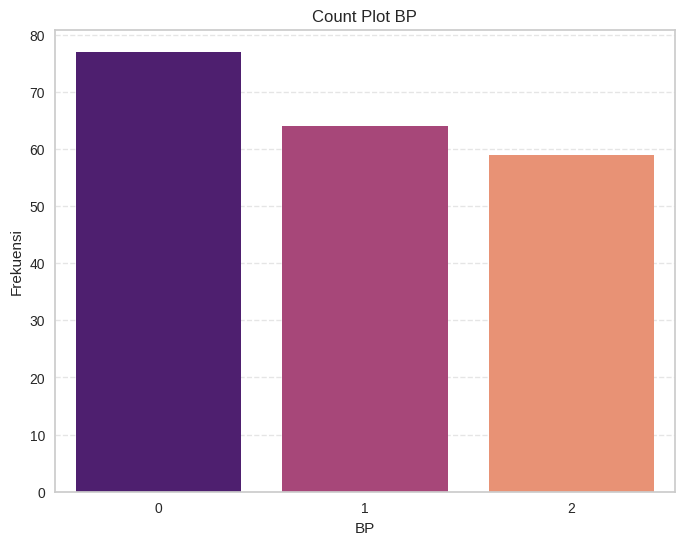

<ipython-input-50-d8bc15104a6c>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




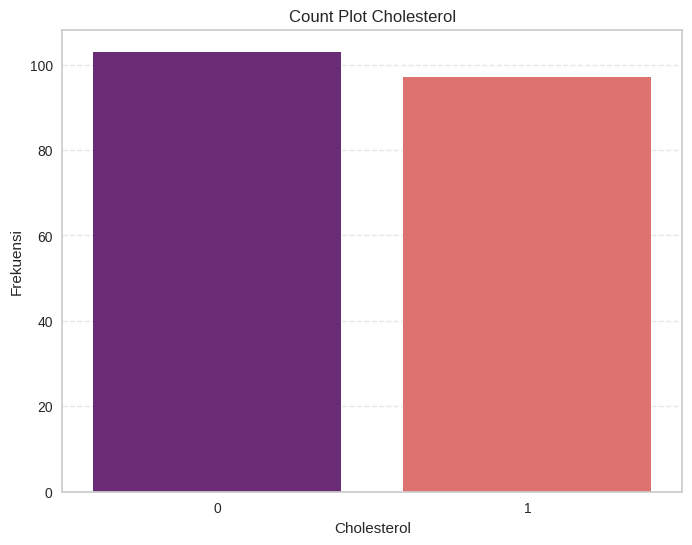

<ipython-input-50-d8bc15104a6c>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




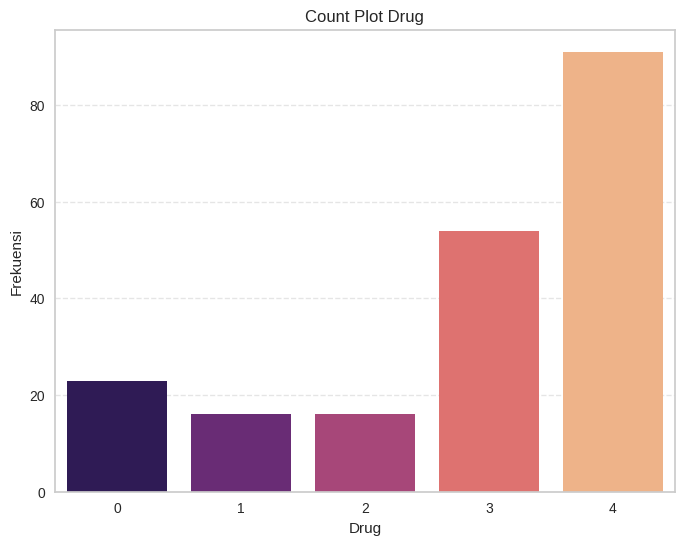

In [50]:
import seaborn as sns

# Visualisasi Count Plot untuk Fitur Kategorik
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[feature], palette='magma')
    plt.title(f'Count Plot {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()


1. Distribusi Kategori: Count plot digunakan untuk memvisualisasikan distribusi dari fitur kategorik seperti Sex, BP, Cholesterol, dan Drug. Ini membantu untuk memahami seberapa seimbang atau tidak seimbangnya distribusi kategori dalam data.
2. Identifikasi Ketidakseimbangan: Jika salah satu kategori memiliki jumlah yang jauh lebih tinggi atau lebih rendah dibandingkan kategori lainnya, ini dapat menunjukkan ketidakseimbangan data, yang dapat mempengaruhi model prediktif.
3. Analisis Visual yang Cepat: Count plot memberikan gambaran langsung dan mudah dimengerti tentang frekuensi masing-masing kategori dalam dataset.

In [52]:
import plotly.express as px

# Heatmap Korelasi Interaktif dengan Plotly
fig = px.imshow(df.corr(),
                text_auto=True,
                color_continuous_scale="Viridis")
fig.update_layout(
    title="Heatmap Korelasi Fitur (Interaktif)",
    template="plotly_dark",
    coloraxis_colorbar=dict(
        title="Korelasi",
        tickvals=[-1, 0, 1],
        ticks="outside"
    )
)
fig.show()


Visualisasi heatmap korelasi ini memungkinkan untuk melihat hubungan antara fitur numerik dalam dataset secara langsung. Dengan menggunakan Plotly untuk visualisasi interaktif, Anda dapat dengan mudah menilai korelasi antar fitur, mengidentifikasi fitur yang sangat berkorelasi, dan memahami hubungan linear yang mungkin mempengaruhi pemodelan data.
1. Heatmap Korelasi: Visualisasi ini memberikan gambaran visual mengenai seberapa kuat hubungan linear antara fitur-fitur numerik dalam dataset.Nilai korelasi yang mendekati 1 menunjukkan hubungan positif yang sangat kuat antara dua fitur. Nilai korelasi yang mendekati -1 menunjukkan hubungan negatif yang sangat kuat. Nilai korelasi yang mendekati 0 menunjukkan tidak ada hubungan linier yang signifikan antara dua fitur.
2. Interaktivitas: Karena menggunakan Plotly, heatmap ini bersifat interaktif, artinya Anda dapat memperbesar, memperkecil, dan mengarahkan mouse untuk melihat nilai korelasi secara lebih detail.

In [53]:
import plotly.express as px

# Pairplot Interaktif
fig = px.scatter_matrix(
    df,
    dimensions=["Age", "Na_to_K", "BP"],
    color="Drug",
    title="Hubungan Antar Fitur Berdasarkan Kategori Obat (Interaktif)",
    color_continuous_scale="Viridis"
)
fig.update_traces(
    diagonal_visible=False,
    marker=dict(size=5, opacity=0.7)
)
fig.update_layout(
    template="plotly_white",
    width=800, height=800,
    title_x=0.5,
    coloraxis_colorbar=dict(title="Kategori Obat")
)
fig.show()


Visualisasi scatter matrix interaktif ini sangat berguna untuk mengidentifikasi hubungan antar fitur dalam dataset serta untuk memeriksa apakah kategori obat memiliki pola tertentu yang terlihat jelas dalam hubungan antar fitur. Dengan palet warna yang berbeda untuk setiap kategori obat, ini memungkinkan visualisasi yang lebih intuitif dan analisis data yang lebih mendalam.

3. EDA Lanjut

- Hubungan yang paling kuat dalam dataset ini terletak antara rasio natrium terhadap kalium dalam darah (Na_to_K) dan jenis obat yang diresepkan (Drug).
- Usia pasien (Age) tidak menunjukkan pengaruh yang signifikan terhadap jenis obat yang diberikan atau rasio Na_to_K.
- Terdapat korelasi negatif yang sangat lemah antara rasio Na_to_K dan usia pasien, yang mengindikasikan bahwa tidak ada hubungan linier yang kuat antara kedua variabel tersebut.

- Nilai 0 dalam tabel hubungan antara fitur kategorik dan variabel target menunjukkan bahwa kombinasi nilai tertentu tidak ada dalam dataset.
- Nilai 0 pada tabel kontingensi setelah transformasi tidak selalu berarti tidak ada hubungan antara nilai-nilai kategorikal asli karena menggunakan transformasi yang telah diterapkan dan menggunakan mapping Label Encoder untuk menginterpretasikan hasil dengan benar.

Fitur: Age
Jumlah outlier: 0
Persentase outlier: 0.00%
Outlier tidak signifikan, tidak perlu ditangani.

Fitur: Na_to_K
Jumlah outlier: 8
Persentase outlier: 4.00%
Outlier tidak signifikan, tidak perlu ditangani.


Korelasi antara variabel numerik dan target:
              Age   Na_to_K      Drug
Age      1.000000 -0.063119 -0.004828
Na_to_K -0.063119  1.000000  0.589120
Drug    -0.004828  0.589120  1.000000


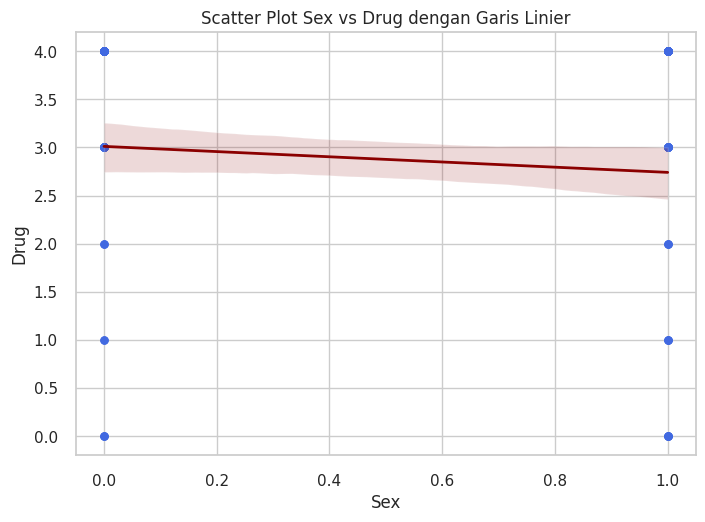

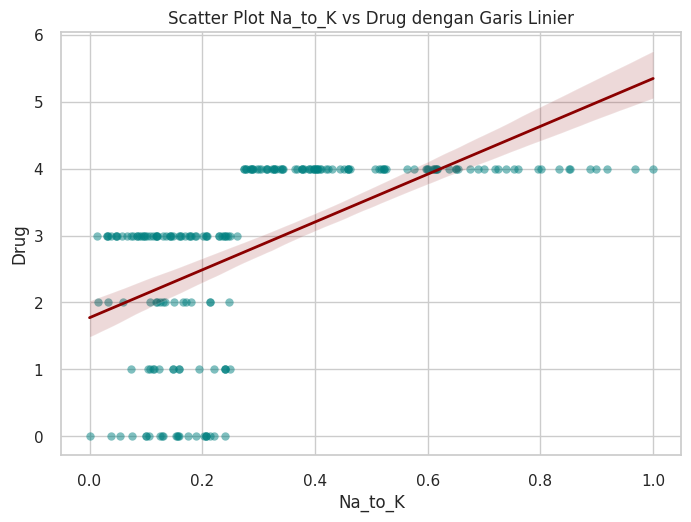


Hubungan antara Sex dan Drug:
Drug   0   1  2   3   4
Sex                    
0      9   6  7  27  47
1     14  10  9  27  44

Hubungan antara BP dan Drug:
Drug   0   1   2   3   4
BP                      
0     23  16   0   0  38
1      0   0  16  18  30
2      0   0   0  36  23

Hubungan antara Cholesterol dan Drug:
Drug          0  1   2   3   4
Cholesterol                   
0            12  8  16  20  47
1            11  8   0  34  44


In [58]:
!pip install colorama
from colorama import Fore, Style
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Mencari Outlier (dengan IQR)
def find_outliers_IQR(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

for feature in numerical_features:
    outliers = find_outliers_IQR(df, feature)
    num_outliers = len(outliers)
    percentage_outliers = (num_outliers / len(df)) * 100

    # Print dengan warna menggunakan colorama
    print(Fore.CYAN + f"Fitur: {feature}")
    print(Fore.YELLOW + f"Jumlah outlier: {num_outliers}")
    print(Fore.MAGENTA + f"Persentase outlier: {percentage_outliers:.2f}%" + Style.RESET_ALL)

    # Menentukan apakah outlier signifikan
    if percentage_outliers > 5:
        print(Fore.RED + "Outlier signifikan, perlu ditangani.\n" + Style.RESET_ALL)
    else:
        print(Fore.GREEN + "Outlier tidak signifikan, tidak perlu ditangani.\n" + Style.RESET_ALL)

# 2. Mencari Pola dan Hubungan Antar Variabel
# a. Korelasi antar variabel numerik
correlation_matrix = df[['Age', 'Na_to_K', 'Drug']].corr()
print(Fore.CYAN + "\nKorelasi antara variabel numerik dan target:" + Style.RESET_ALL)
print(correlation_matrix)

# Scatter Plot dengan Warna Menarik
sns.set(style="whitegrid")
sns.regplot(x='Sex', y='Drug', data=df,
            scatter_kws={'alpha':0.5, 'color':'royalblue'}, line_kws={'color':'darkred', 'linewidth':2})
plt.title('Scatter Plot Sex vs Drug dengan Garis Linier')
plt.xlabel('Sex')
plt.ylabel('Drug')
plt.show()

sns.regplot(x='Na_to_K', y='Drug', data=df,
            scatter_kws={'alpha':0.5, 'color':'teal'}, line_kws={'color':'darkred', 'linewidth':2})
plt.title('Scatter Plot Na_to_K vs Drug dengan Garis Linier')
plt.xlabel('Na_to_K')
plt.ylabel('Drug')
plt.show()

# b. Hubungan antara variabel kategorik dan variabel target
for feature in categorical_features[:-1]:  # Exclude 'Drug' (target)
    drug_counts = pd.crosstab(df[feature], df['Drug'])
    print(Fore.CYAN + f"\nHubungan antara {feature} dan Drug:" + Style.RESET_ALL)
    print(drug_counts)



### 1. **Mencari Outlier dengan IQR (Interquartile Range)**
#### Prosesnya adalah sebagai berikut:
- **Menghitung Kuartil (Q1 dan Q3)**: Kuartil pertama (Q1) adalah nilai pada posisi 25% dari data yang terurut, dan kuartil ketiga (Q3) adalah nilai pada posisi 75%.
- **Menghitung IQR**: IQR dihitung sebagai selisih antara Q3 dan Q1.
- **Menentukan batas bawah dan atas**:
  - **Batas bawah** dihitung sebagai Q1 - 1.5 * IQR
  - **Batas atas** dihitung sebagai Q3 + 1.5 * IQR
- **Mencari outlier**: Data yang berada di luar batas bawah atau batas atas dianggap sebagai outlier.
#### Visualisasi menggunakan **colorama**:
- Output menggunakan warna berbeda untuk menekankan informasi penting:
  - **CYAN** untuk nama fitur.
  - **YELLOW** untuk jumlah outlier.
  - **MAGENTA** untuk persentase outlier.
  - **RED** atau **GREEN** untuk menandai apakah outlier perlu penanganan.
### 2. **Mencari Pola dan Hubungan Antar Variabel**
#### a. **Korelasi antar Variabel Numerik**
- **Korelasi Matriks**: Menggunakan fungsi `.corr()` untuk menghitung korelasi antar variabel numerik dalam dataset seperti **Age**, **Na_to_K**, dan **Drug**.
- Korelasi menunjukkan sejauh mana dua variabel bergerak bersama. Nilai korelasi bisa berkisar antara -1 (korelasi negatif sempurna), 0 (tidak ada korelasi), hingga 1 (korelasi positif sempurna).
#### b. **Visualisasi dengan Scatter Plot**
- **Scatter Plot Sex vs Drug**:
  - Scatter plot pertama menunjukkan hubungan antara **Sex** (jenis kelamin) dan **Drug** (obat yang digunakan), dengan garis linier untuk menunjukkan pola umum antara keduanya.
  - Warna titik **royalblue** dan garis linier **darkred** digunakan untuk membedakan data.
- **Scatter Plot Na_to_K vs Drug**:
  - Scatter plot kedua menunjukkan hubungan antara rasio **Na_to_K** (rasio natrium terhadap kalium) dan **Drug**.
  - Titik pada plot ini berwarna **teal**, dan garis linier berwarna **darkred**.

**Fungsi `sns.regplot`** digunakan untuk membuat scatter plot dan sekaligus menggambar garis regresi linier, yang membantu untuk melihat hubungan linear antara dua variabel.
#### c. **Hubungan Variabel Kategorik dengan Variabel Target**
- Menggunakan **crosstab** untuk membuat tabel kontingensi yang menunjukkan hubungan antara setiap variabel kategorik (**Sex**, **BP**, **Cholesterol**) dengan **Drug** (target variabel).
- Tabel kontingensi menunjukkan distribusi frekuensi antara dua variabel kategorik. Ini memungkinkan kita untuk melihat pola penggunaan obat berdasarkan kategori tertentu, seperti jenis kelamin atau tekanan darah.


Akurasi Model: 1.0
Laporan Klasifikasi:
               precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



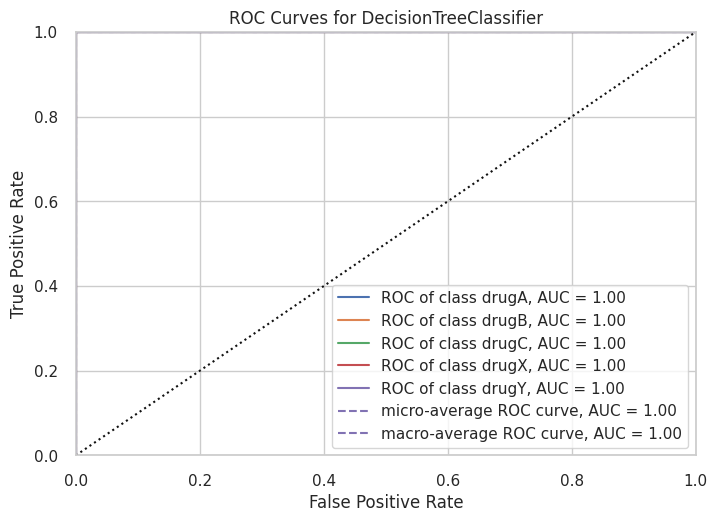

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/classification_report.py:204: 

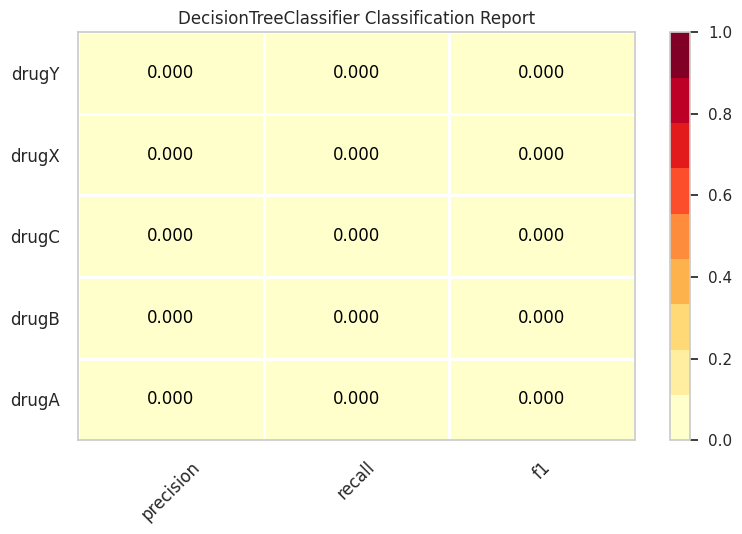

Hyperparameter terbaik: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


DecisionTreeClassifier(random_state=42)

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Impor OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('/content/drive/MyDrive/Decision-Tree/drug200.csv')

# Pembuatan Model Decision Tree
# Pembuatan Model dan Pencarian Hyperparameter Terbaik

# a. Bagi data menjadi set pelatihan dan pengujian
# Use the processed X instead of redefining it
X = df[['Age', 'Na_to_K', 'Sex', 'BP', 'Cholesterol']].copy()  # Create a copy to avoid modifying the original
y = df['Drug']

# One-hot encode categorical features
categorical_features = ['Sex', 'BP', 'Cholesterol']
for feature in categorical_features:
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for dense output
    encoded_feature = encoder.fit_transform(X[[feature]])
    encoded_df = pd.DataFrame(encoded_feature, columns=[f"{feature}_{cat}" for cat in encoder.categories_[0]])
    X = X.drop(columns=[feature]).join(encoded_df)  # Replace original feature with encoded columns

# Split data after encoding
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Randomized Search untuk mencegah overfitting
param_dist = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}
random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_distributions=param_dist,
                                   n_iter=50, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)
best_clf = random_search.best_estimator_

# Langkah 5: Evaluasi Model dan Visualisasi dengan Yellowbrick
# Evaluasi akurasi dan laporan klasifikasi
y_pred = best_clf.predict(X_test)
print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Visualisasi ROC Curve dan Laporan Klasifikasi dengan Yellowbrick
visualizer_roc = ROCAUC(best_clf, classes=le.classes_)
visualizer_roc.fit(X_train, y_train)
visualizer_roc.score(X_test, y_test)
visualizer_roc.show()

visualizer_class_report = ClassificationReport(best_clf, classes=le.classes_)
visualizer_class_report.fit(X_train, y_train)
visualizer_class_report.score(X_test, y_test)
visualizer_class_report.show()

# Confusion Matrix Interaktif dengan Plotly
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_fig = px.imshow(conf_matrix, text_auto=True, color_continuous_scale="Blues",
                            labels=dict(x="Predicted", y="True", color="Count"))
conf_matrix_fig.update_layout(title="Confusion Matrix Interaktif")
conf_matrix_fig.show()

# b. Tentukan hyperparameter yang akan diuji
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.7, 3, 5]  # Experiment with different values
}

# c. Buat model Decision Tree
model = DecisionTreeClassifier(random_state=42)

# d. Gunakan GridSearchCV untuk mencari hyperparameter terbaik
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')  # cv=5 untuk 5-fold cross-validation
grid_search.fit(X_train, y_train)

# e. Tampilkan hyperparameter terbaik
print("Hyperparameter terbaik:", grid_search.best_params_)

# f. Gunakan model dengan hyperparameter terbaik
best_model = grid_search.best_estimator_

# g. Membangun Model
# Instead, use the encoded X from above:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

### Penjelasan Detail Hyperparameter pada Decision Tree:

1. **Criterion = 'gini'**  
   - Gini Impurity digunakan sebagai ukuran untuk memilih fitur dan titik pemisah pada setiap node. Tujuannya adalah meminimalkan impurity di setiap node agar klasifikasi menjadi lebih akurat. Semakin rendah nilai Gini, semakin murni data dalam node tersebut.

2. **max_depth = 5**  
   - Menentukan kedalaman maksimum pohon keputusan. Dengan nilai **5**, pohon akan dibatasi hingga 5 level untuk menghindari overfitting, di mana model terlalu rumit dan hanya menghafal data pelatihan tanpa bisa digeneralisasi ke data baru.

3. **max_features = None**  
   - Semua fitur yang tersedia akan dipertimbangkan untuk memilih pemisahan terbaik pada setiap node. Ini memberikan fleksibilitas lebih pada model, namun berpotensi membuat pohon lebih kompleks dan rentan terhadap overfitting jika tidak dibatasi dengan teknik lain.

4. **min_samples_leaf = 1**  
   - Menentukan jumlah minimum sampel yang harus ada di setiap leaf node (node akhir). Dengan nilai **1**, setiap node akhir bisa berisi hanya satu sampel, memungkinkan fleksibilitas lebih pada pembentukan node tetapi berisiko terhadap overfitting.

5. **min_samples_split = 2**  
   - Menentukan jumlah minimum sampel yang diperlukan untuk membagi node internal. Dengan nilai **2**, model akan membagi node jika terdapat minimal dua sampel di dalamnya, yang memberi fleksibilitas tetapi dapat menyebabkan model membelah data terlalu banyak, sehingga rentan terhadap overfitting.
   
Hyperparameter pada model pohon keputusan ini dirancang untuk mengoptimalkan keseimbangan antara akurasi dan kompleksitas model:
- **Gini Impurity** digunakan untuk memastikan pembagian data yang murni.
- **max_depth = 5** membatasi kedalaman pohon untuk mencegah overfitting.
- **max_features = None** memungkinkan semua fitur dipertimbangkan saat pemisahan, meningkatkan fleksibilitas tetapi berisiko overfitting.
- **min_samples_leaf = 1** dan **min_samples_split = 2** memberikan fleksibilitas lebih dalam membentuk node, namun juga meningkatkan risiko model yang terlalu rumit dan tidak mampu menggeneralisasi data baru dengan baik.

***EVALUASI DAN VISUALISASI DECISION TREE***

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



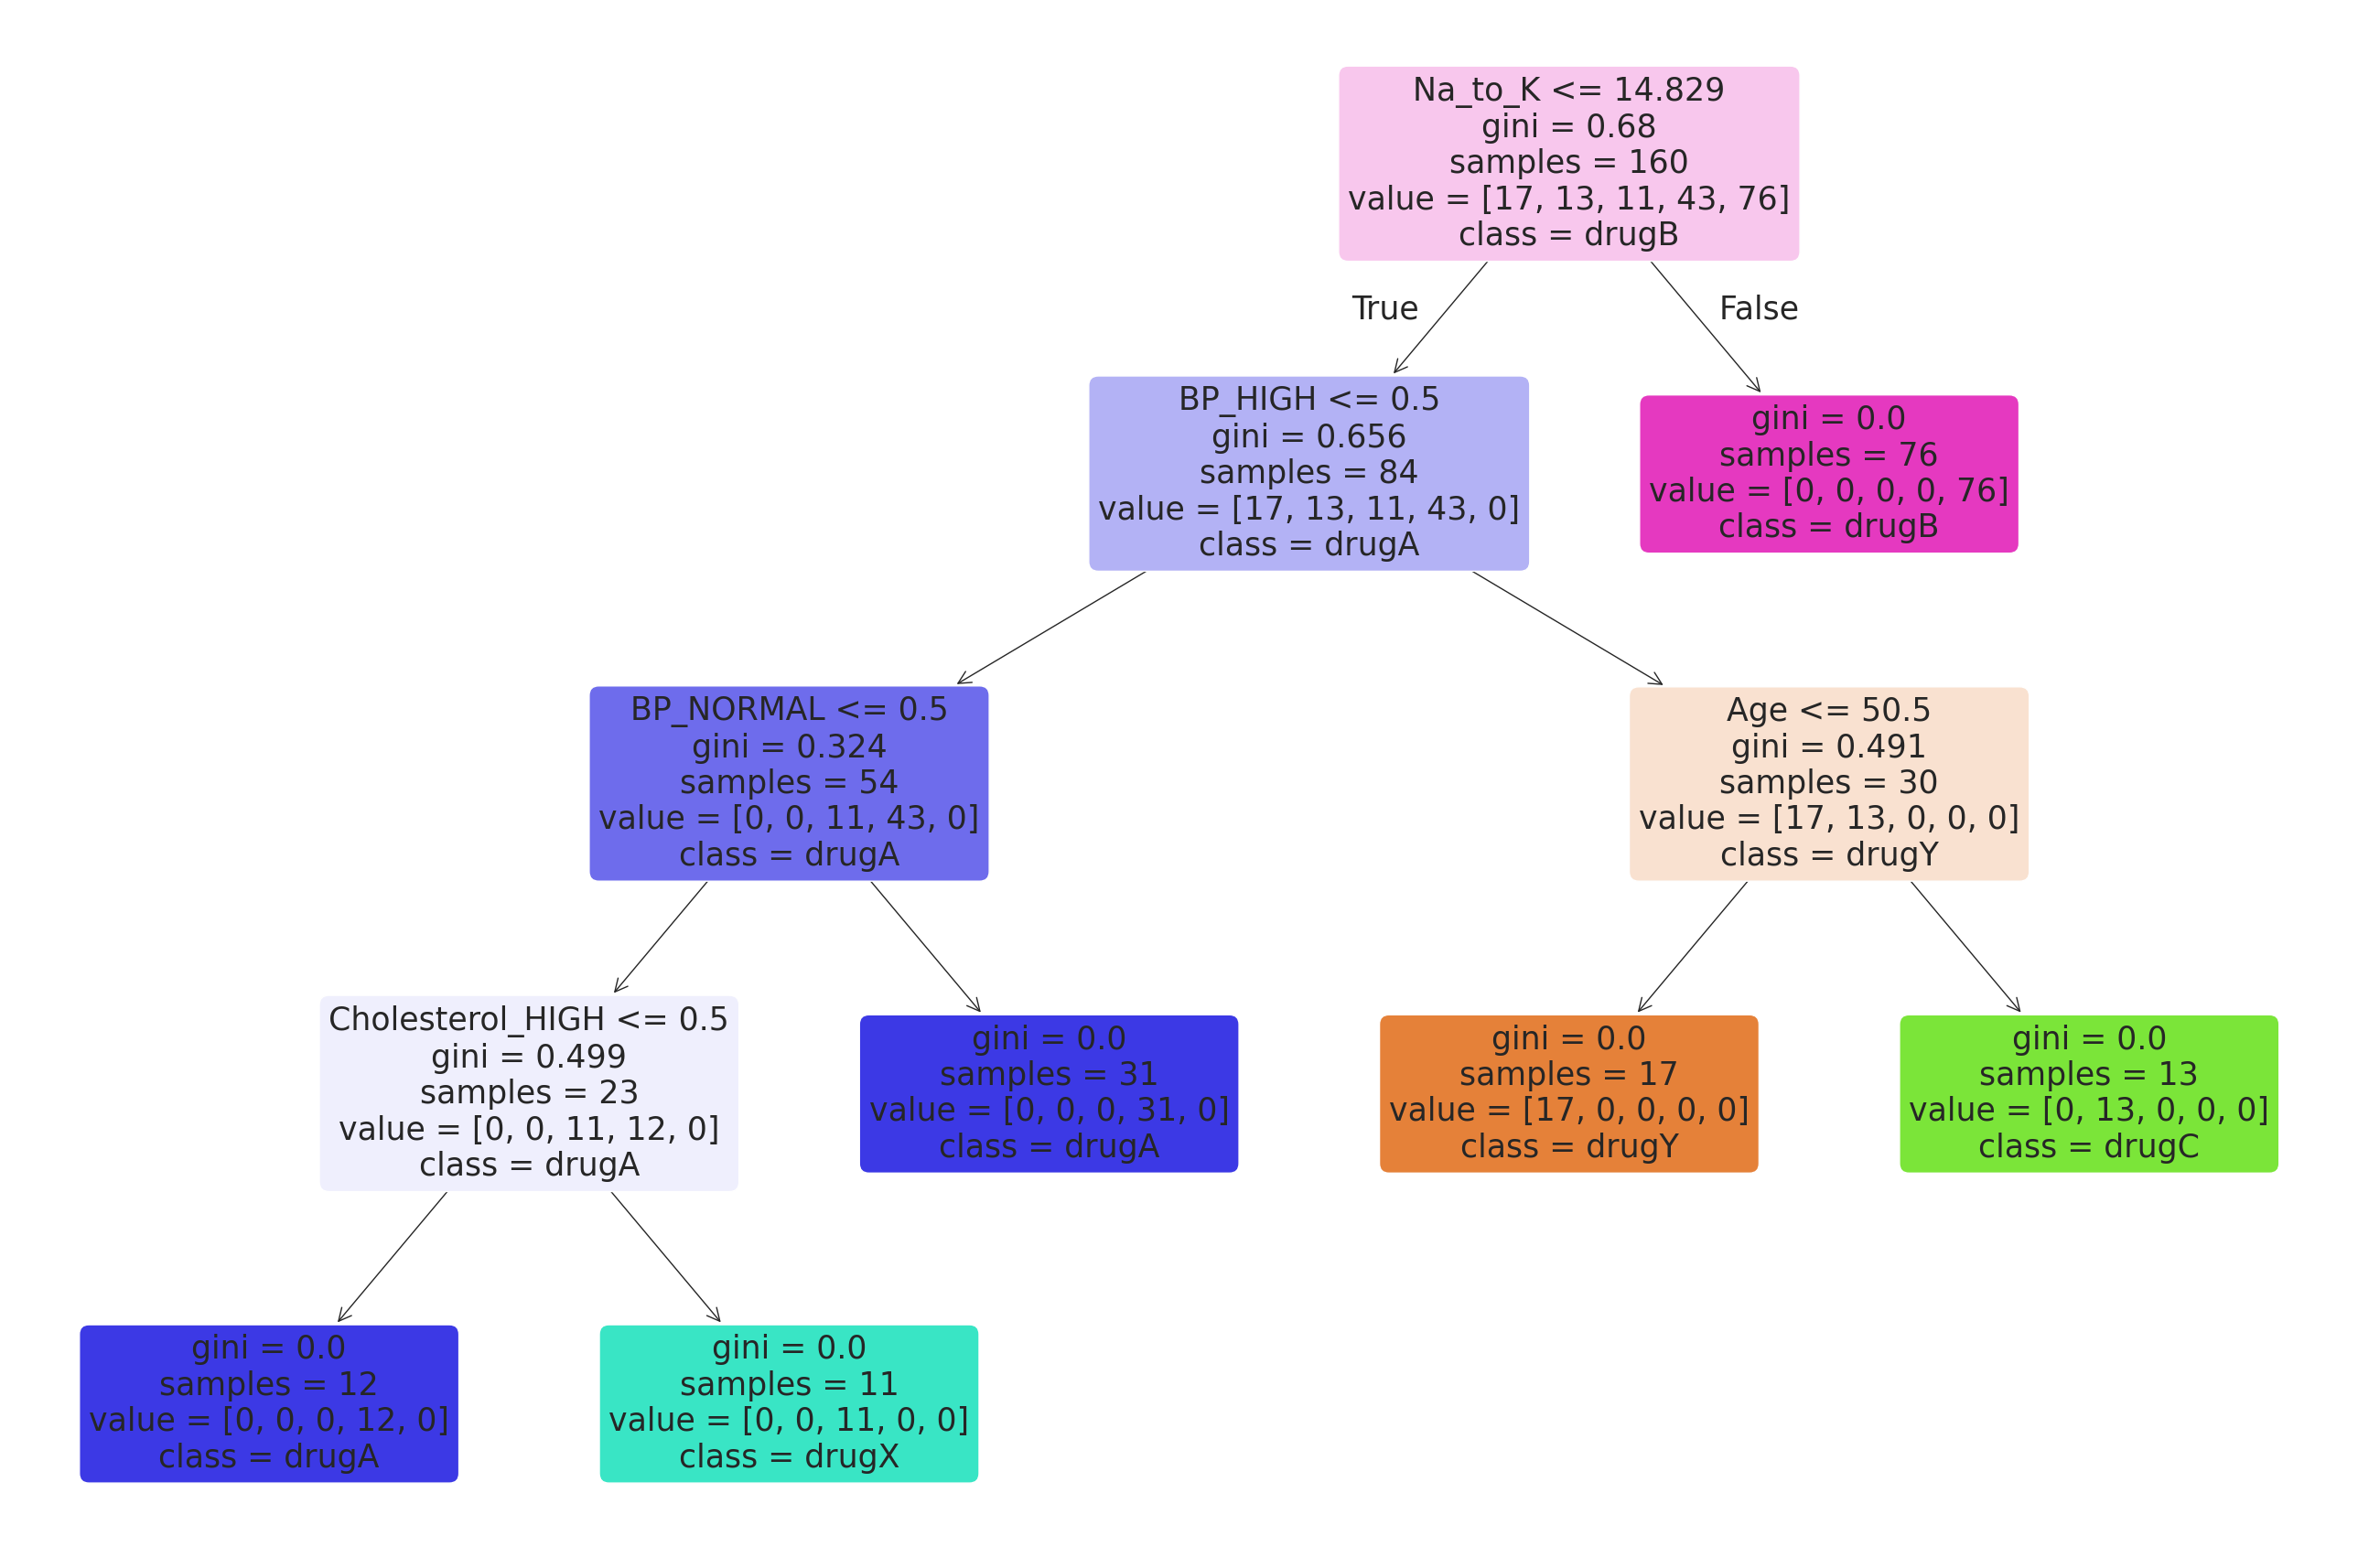

In [76]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score # Import precision_score and recall_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# a. Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # Now precision_score is defined
recall = recall_score(y_test, y_pred, average='weighted') # Now recall_score is defined
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(classification_report(y_test, y_pred))

# b. Visualisasi Decision Tree dengan Semua Sub-tree
plt.figure(figsize=(33, 22))# Ukuran figur yang sangat besar

# c. Use X_train.columns for feature_names after one-hot encoding
plot_tree(model,
          feature_names=X_train.columns,  # Changed to X.columns
          class_names=df['Drug'].unique().astype(str),
          filled=True,
          rounded=True,
          fontsize=25, # Ukuran font diperbesar
          max_depth=5 # Menampilkan semua level pohon hingga kedalaman 9
          # Parameter min_samples_split dan min_samples_leaf dihapus
          # karena tidak berlaku untuk plot_tree.
          # Parameter-parameter ini hanya digunakan saat membangun model (DecisionTreeClassifier).
          )
plt.savefig('decision_tree.png', bbox_inches='tight')
plt.show()

# **Analisis dan Potensi Masalah**

### **Hasil Evaluasi Model**
#### 1. **Akurasi (Accuracy: 1.0)**  
   Akurasi mengukur sejauh mana model dapat memprediksi label dengan benar pada dataset pengujian. Akurasi 1.0 berarti model dapat memprediksi 100% data pengujian dengan benar, tanpa ada kesalahan.
   **Interpretasi:**
   - Akurasi yang sempurna ini menunjukkan bahwa model mampu memprediksi setiap contoh dalam set pengujian dengan benar. Namun, hal ini harus dipertanyakan lebih lanjut, terutama dalam konteks potensi **overfitting**.
   - **Overfitting** adalah masalah yang muncul ketika model terlalu rumit dan belajar untuk "menghafal" data pelatihan secara berlebihan. Ketika sebuah model terlalu pas (fit) terhadap data pelatihan, ia akan memiliki kinerja yang sangat baik pada data pelatihan tersebut, tetapi tidak dapat menggeneralisasi dengan baik ke data baru yang tidak dilihat sebelumnya. Hal ini mengarah pada kesalahan yang lebih besar saat model dihadapkan dengan data nyata atau data yang berbeda.
   - Salah satu kemungkinan overfitting adalah jika dataset terlalu kecil atau jika model mempelajari pola yang sangat kompleks, yang tidak umum terjadi pada data dunia nyata. Sehingga, meskipun model memberikan akurasi sempurna pada data pengujian, ini bisa saja tidak mencerminkan kemampuannya pada data baru. Hal ini disebabkan dataset Drug memiliki 200 sampel data saja.
#### 2. **Precision (Precision: 1.0)**  
   Precision mengukur ketepatan prediksi positif yang dilakukan oleh model. Precision 1.0 berarti bahwa setiap kali model memprediksi kelas positif, prediksi tersebut selalu benar (tanpa ada kesalahan dalam memprediksi data negatif sebagai positif, yang disebut false positives).
   **Interpretasi:**
   - Precision 1.0 sangat bagus karena menunjukkan bahwa tidak ada prediksi positif yang salah. Model dengan precision yang tinggi ini berguna dalam konteks di mana kita ingin menghindari **false positives**, misalnya dalam kasus deteksi penyakit di mana kita ingin memastikan bahwa setiap diagnosis positif adalah benar adanya.
   - Dengan precision 1.0, dapat dipastikan bahwa model hanya mengklasifikasikan data ke kelas positif jika sangat yakin data tersebut benar-benar masuk dalam kelas tersebut. Ini berarti bahwa prediksi yang salah tidak terjadi, karena jika ada keraguan dalam klasifikasi, model akan memilih untuk tidak memprediksi sebagai positif.
#### 3. **Recall (Recall: 1.0)**  
   Recall mengukur kemampuan model untuk menangkap semua instansi positif yang sebenarnya, atau seberapa baik model dapat mengenali kelas positif yang ada dalam data. Recall 1.0 berarti model berhasil mengenali semua contoh kelas positif yang ada, tanpa ada yang terlewat (tanpa **false negatives**).
   **Interpretasi:**
   - Dengan **Recall 1.0**, model sangat baik dalam menangkap setiap instance positif. Artinya, model tidak pernah melewatkan contoh yang seharusnya dikenali sebagai positif. Ini adalah fitur penting dalam situasi di mana tidak boleh ada contoh positif yang terlewat, seperti dalam pengenalan penyakit serius di mana kita ingin mengidentifikasi setiap individu yang benar-benar menderita kondisi tersebut.
   - Recall 1.0 menunjukkan bahwa meskipun model tidak selalu menghasilkan prediksi positif dengan ketepatan tertinggi (seperti yang terlihat di precision), ia selalu dapat menemukan setiap instance yang termasuk dalam kelas positif dan mengklasifikasikannya dengan benar. Dalam konteks ini, recall sangat penting terutama ketika kita ingin menghindari **false negatives**, yang bisa berakibat fatal dalam beberapa situasi.
#### 4. **F1-score (F1-score: 1.0)**  
   F1-score adalah rata-rata harmonik dari precision dan recall. F1-score 1.0 menunjukkan keseimbangan yang sempurna antara precision dan recall, yang menunjukkan bahwa model tidak hanya akurat dalam memprediksi kelas positif (precision) tetapi juga sangat baik dalam menangkap setiap contoh kelas positif (recall).
   **Interpretasi:**
   - **F1-score** memberikan gambaran umum tentang performa model, menggabungkan kedua aspek penting (precision dan recall) dalam satu metrik. Jika F1-score mendekati 1.0, ini menunjukkan bahwa model memiliki keseimbangan yang sangat baik antara keduanya, yaitu tidak terlalu fokus pada precision saja (hingga mengorbankan recall), atau sebaliknya.
   - Dengan **F1-score 1.0**, model memiliki performa yang sangat baik, artinya model tidak hanya presisi dalam prediksi positif tetapi juga sangat sensitif terhadap deteksi semua instance positif yang seharusnya ada dalam data.
### **Interpretasi Decision Tree**
#### **Struktur Pohon Keputusan**
Pohon keputusan ini dibangun dengan beberapa langkah pemisahan, berdasarkan berbagai fitur data. Pada dasarnya, pohon keputusan ini mencoba membagi dataset berdasarkan fitur-fitur yang paling memberikan informasi untuk memisahkan kelas-kelas data yang ada. Dalam hal ini, pohon keputusan menghasilkan **node-node** yang menggambarkan berbagai keputusan berdasarkan fitur tertentu. Setiap node memutuskan apakah data masuk ke cabang kiri atau kanan berdasarkan **threshold** yang ditentukan pada fitur tersebut.
**Interpretasi Decision Tree**

Pohon keputusan yang dibangun berhasil membagi data ke dalam beberapa node daun yang sebagian besar memiliki nilai Gini yang rendah (0.0), menandakan bahwa model ini dapat mengklasifikasikan sebagian besar data dengan sangat baik. Dalam hal ini, model menggunakan fitur-fitur seperti Na_to_K, BP_0, BP_2, Cholesterol_0, dan Age untuk membuat keputusan di setiap tingkat pohon.

Berikut adalah langkah-langkah dan interpretasi dari masing-masing node pada pohon keputusan:

1. **Root Node (Node Akar)** dengan fitur Na_to_K:
   - **Fitur**: Na_to_K
   - **Threshold**: Na_to_K ≤ 0.268
   - **Gini Impurity**: 0.68 (menunjukkan keragaman kelas yang cukup besar di awal)
   - **Jumlah Sampel**: 160
   - **Distribusi Kelas**: [17, 13, 11, 43, 76]
   - **Prediksi Kelas**: Kelas 1 (karena kelas 1 memiliki jumlah terbanyak)
   - Pembagian data dilakukan berdasarkan nilai Na_to_K. Jika Na_to_K ≤ 0.268, data menuju cabang kiri, jika lebih besar, menuju cabang kanan.

2. **Cabang Kanan (Na_to_K > 0.268)** - **Node 1**:
   - **Fitur**: Tidak ada pembagian lebih lanjut.
   - **Gini Impurity**: 0.0 (hanya ada satu kelas, yakni drugB)
   - **Jumlah Sampel**: 76
   - **Distribusi Kelas**: [0, 0, 0, 0, 76]
   - **Prediksi Kelas**: drugB

3. **Cabang Kiri (Na_to_K ≤ 0.268)** - **Node 2**:
   - **Fitur**: BP_0
   - **Threshold**: BP_0 ≤ 0.5
   - **Gini Impurity**: 0.656 (keragaman yang cukup besar)
   - **Jumlah Sampel**: 84
   - **Distribusi Kelas**: [17, 13, 11, 43, 0]
   - **Prediksi Kelas**: drugA
   - Pembagian data berdasarkan nilai BP_0. Jika BP_0 ≤ 0.5, data menuju cabang kiri, jika lebih besar, menuju cabang kanan.

4. **Cabang Kiri (BP_0 ≤ 0.5)** - **Node 3**:
   - **Fitur**: BP_2
   - **Threshold**: BP_2 ≤ 0.5
   - **Gini Impurity**: 0.324 (keragaman kelas lebih rendah)
   - **Jumlah Sampel**: 54
   - **Distribusi Kelas**: [0, 0, 11, 43, 0]
   - **Prediksi Kelas**: drugA
   - Data dibagi berdasarkan BP_2. Jika BP_2 ≤ 0.5, data menuju cabang kiri, jika lebih besar, menuju cabang kanan.

5. **Cabang Kiri (BP_2 ≤ 0.5)** - **Node 4**:
   - **Fitur**: Cholesterol_0
   - **Threshold**: Cholesterol_0 ≤ 0.5
   - **Gini Impurity**: 0.499 (keragaman kelas masih ada)
   - **Jumlah Sampel**: 23
   - **Distribusi Kelas**: [0, 0, 11, 12, 0]
   - **Prediksi Kelas**: drugA
   - Data dibagi berdasarkan nilai Cholesterol_0. Jika Cholesterol_0 ≤ 0.5, data menuju cabang kiri, jika lebih besar, menuju cabang kanan.

6. **Cabang Kiri (Cholesterol_0 ≤ 0.5)** - **Node 5**:
   - **Gini Impurity**: 0.0 (semua sampel adalah kelas drugA)
   - **Jumlah Sampel**: 12
   - **Distribusi Kelas**: [0, 0, 0, 12, 0]
   - **Prediksi Kelas**: drugA

7. **Cabang Kanan (Cholesterol_0 > 0.5)** - **Node 6**:
   - **Gini Impurity**: 0.0 (semua sampel adalah kelas drugX)
   - **Jumlah Sampel**: 11
   - **Distribusi Kelas**: [0, 0, 11, 0, 0]
   - **Prediksi Kelas**: drugX

8. **Cabang Kanan (BP_2 > 0.5)** - **Node 7**:
   - **Gini Impurity**: 0.0 (semua sampel adalah kelas drugA)
   - **Jumlah Sampel**: 31
   - **Distribusi Kelas**: [0, 0, 0, 31, 0]
   - **Prediksi Kelas**: drugA

9. **Cabang Kanan (BP_0 > 0.5)** - **Node 8**:
   - **Fitur**: Age
   - **Threshold**: Age ≤ 0.602
   - **Gini Impurity**: 0.491 (keragaman kelas sedang)
   - **Jumlah Sampel**: 30
   - **Distribusi Kelas**: [17, 13, 0, 0, 0]
   - **Prediksi Kelas**: drugY
   - Pembagian data berdasarkan nilai Age. Jika Age ≤ 0.602, data menuju cabang kiri, jika lebih besar, menuju cabang kanan.

10. **Cabang Kiri (Age ≤ 0.602)** - **Node 9**:
    - **Gini Impurity**: 0.0 (semua sampel adalah kelas drugY)
    - **Jumlah Sampel**: 17
    - **Distribusi Kelas**: [17, 0, 0, 0, 0]
    - **Prediksi Kelas**: drugY

11. **Cabang Kanan (Age > 0.602)** - **Node 10**:
    - **Gini Impurity**: 0.0 (semua sampel adalah kelas drugC)
    - **Jumlah Sampel**: 13
    - **Distribusi Kelas**: [0, 13, 0, 0, 0]
    - **Prediksi Kelas**: drugC

**Kesimpulan:**
Pohon keputusan ini secara efektif memisahkan data berdasarkan fitur-fitur penting seperti Na_to_K, BP_0, BP_2, Cholesterol_0, dan Age. Di setiap cabang dan node, keputusan klasifikasi didasarkan pada pemisahan data dengan Gini impurity yang cukup rendah, yang menunjukkan bahwa model dapat membuat keputusan dengan akurasi tinggi. Semua node daun akhirnya mengarah pada klasifikasi yang sangat spesifik tanpa keragaman kelas di dalamnya, yang menunjukkan bahwa model ini bekerja dengan baik dalam mengklasifikasikan data berdasarkan fitur yang relevan.

### **Analisis dan Potensi Masalah**
#### **Overfitting:**
- **Overfitting** adalah masalah besar yang perlu diperhatikan, meskipun model mencapai akurasi sempurna. Ketika model memiliki **akurasi 1.0**, ini bisa jadi indikasi bahwa model sangat cocok dengan data pelatihan dan menghafal setiap detailnya, tanpa benar-benar memahami pola umum dalam data.  
- Overfitting sangat mungkin terjadi jika model terlalu rumit atau dataset yang digunakan sangat kecil. Dalam situasi ini, meskipun model memiliki performa yang sangat baik pada data yang ada, model ini mungkin gagal untuk menggeneralisasi atau memprediksi dengan baik pada data baru yang tidak dilatih.
#### **Data Testing yang Tidak Representatif:**
- Jika data pengujian yang digunakan untuk mengevaluasi model tidak representatif terhadap data dunia nyata, maka hasil evaluasi yang sempurna mungkin hanya mencerminkan performa model pada data pengujian tertentu, tetapi tidak mencerminkan kinerjanya pada data yang lebih bervariasi atau lebih nyata.
#### **Cross-validation:**
•	- **Cross-validation** adalah teknik untuk membagi dataset menjadi beberapa bagian (folds) dan melatih serta menguji model pada setiap bagian tersebut. Ini memberikan gambaran yang lebih realistis dan andal mengenai kinerja model dibandingkan hanya menggunakan satu set pelatihan dan pengujian. Dengan melakukan cross-validation, kita bisa mendapatkan estimasi yang lebih tepat mengenai seberapa baik model dapat menggeneralisasi ke data yang tidak terlihat sebelumnya, karena model akan diuji di berbagai bagian dataset yang berbeda.
Keuntungan cross-validation:
o	Estimasi yang lebih akurat: Karena model diuji pada beberapa subset data yang berbeda, kita mendapatkan evaluasi yang lebih andal.
o	Mengurangi overfitting: Melalui evaluasi pada berbagai bagian data, cross-validation membantu mencegah model hanya mengingat data pelatihan dan menghindari overfitting.
Pruning:
•	Pruning adalah teknik yang digunakan untuk mengurangi kompleksitas pohon keputusan dengan menghapus node atau cabang yang tidak penting. Tujuan dari pruning adalah untuk mencegah overfitting dengan membuat model menjadi lebih sederhana dan lebih mudah untuk digeneralisasi.
Pruning dapat dilakukan dengan dua cara:
o	Cost complexity pruning: Ini adalah teknik pruning yang mengurangi kompleksitas pohon dengan menyeimbangkan antara ukuran pohon dan kinerja model. Tujuan utamanya adalah menemukan tingkat pembelahan pohon yang optimal, di mana menambahkan lebih banyak cabang tidak memberikan manfaat yang signifikan.
o	Minimal cost complexity pruning: Ini adalah teknik yang lebih lanjut yang mencari nilai minimum dari parameter kompleksitas biaya untuk memutuskan di mana pohon harus dipotong.
Keuntungan pruning:
o	Mengurangi overfitting: Dengan menghapus cabang yang tidak penting, kita bisa membuat model lebih sederhana, yang membantu dalam meningkatkan generalisasi ke data yang belum terlihat.
o	Meningkatkan interpretabilitas: Model yang lebih sederhana dengan lebih sedikit cabang lebih mudah untuk dipahami dan diinterpretasikan, yang sangat penting dalam banyak aplikasi seperti analisis bisnis atau kesehatan.
Keterbatasan Model:
•	Dataset kecil: Jika dataset yang digunakan terlalu kecil, meskipun cross-validation dan pruning diterapkan, model mungkin tetap tidak dapat menggeneralisasi dengan baik ke data baru yang sangat berbeda. Dalam kasus ini, meskipun teknik-teknik tersebut dapat membantu, mereka tidak dapat sepenuhnya mengatasi masalah akibat kurangnya data yang representatif dan variatif.
Potensi masalah lainnya:
o	Bias dalam data: Jika dataset memiliki bias (misalnya, jika sebagian besar data berfokus pada satu kelas atau tidak mewakili variasi data yang luas), model mungkin belajar untuk memprediksi dengan sangat baik pada data yang serupa, tetapi gagal mengenali pola dalam data yang berbeda. Teknik seperti SMOTE (Synthetic Minority Over-sampling Technique) dan under-sampling dapat digunakan untuk menangani ketidakseimbangan kelas dalam dataset.
Kesimpulan:
Secara keseluruhan, meskipun model memberikan hasil evaluasi yang sempurna pada dataset pengujian, ada beberapa masalah yang perlu dipertimbangkan, seperti kemungkinan overfitting, data yang tidak representatif, dan keterbatasan dataset kecil. Menggunakan teknik cross-validation dan pruning bisa membantu meningkatkan kinerja model dan mengurangi masalah overfitting. Namun, jika dataset yang digunakan tidak cukup besar atau beragam, model mungkin tetap memiliki keterbatasan dalam generalisasi.
Penting untuk selalu melakukan evaluasi lebih mendalam terhadap model, menggunakan lebih banyak teknik untuk memvalidasi kinerjanya, dan memahami sifat data yang digunakan agar model yang dikembangkan benar-benar dapat diterapkan pada masalah nyata dengan efektif.



Cross-Validation Scores: [1.    1.    1.    0.925 1.   ]
Mean Accuracy: 0.985
Accuracy on Testing Data: 1.0
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



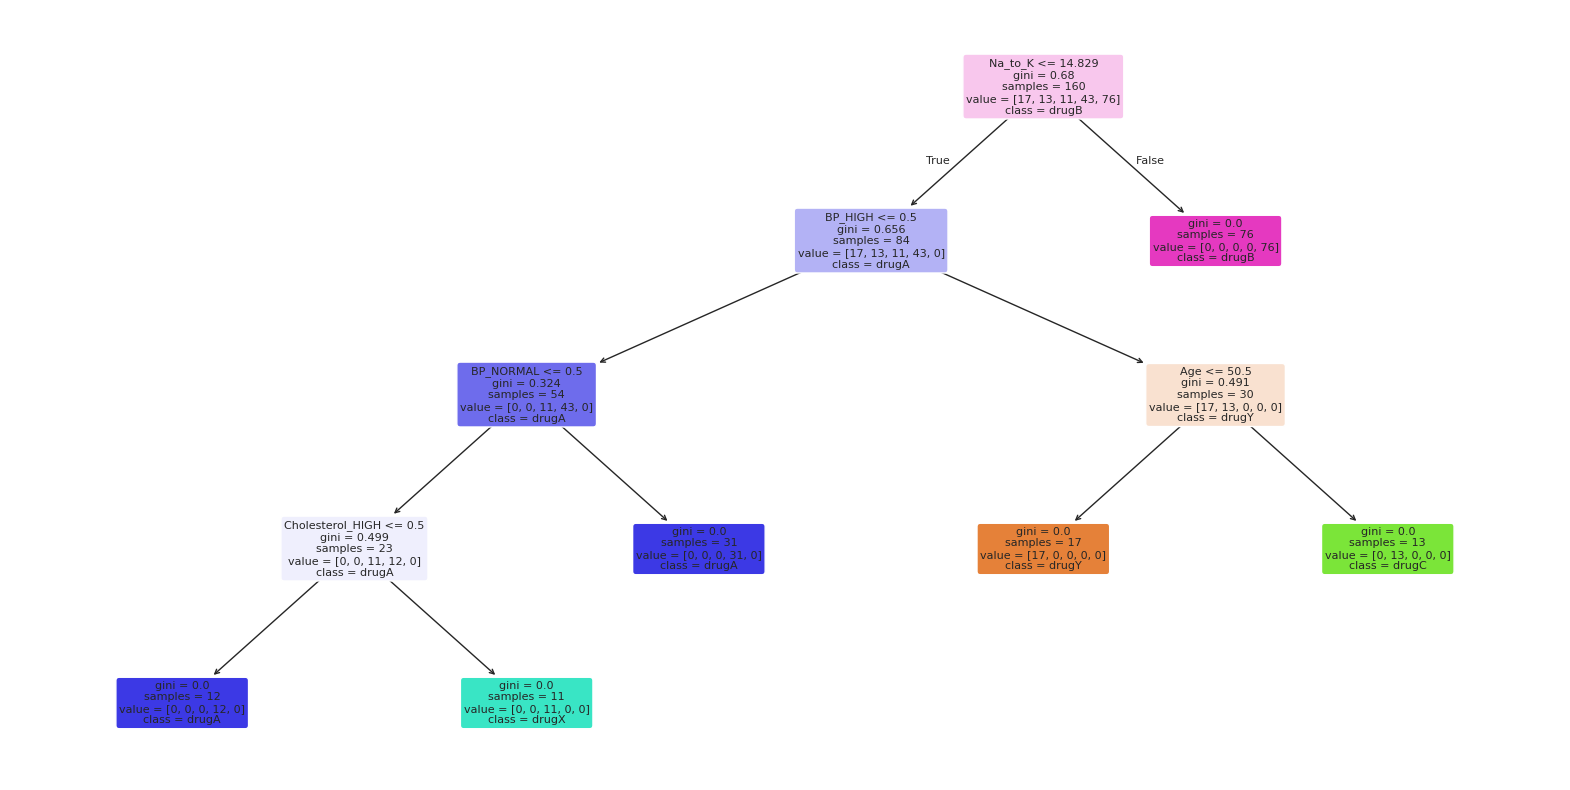

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

# 1. Load data (ganti dengan path data Anda)
data = pd.read_csv('/content/drive/MyDrive/Decision-Tree/drug200.csv')

# 2. Pra-pemrosesan data (One-Hot Encoding)
# ... (kode One-Hot Encoding seperti di contoh sebelumnya) ...

# 3. Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Tentukan model Decision Tree
model = DecisionTreeClassifier(random_state=42)

# 5. Terapkan Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # cv=5 untuk 5-fold cross-validation
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean()}")

# 6. Pruning dengan GridSearchCV
param_grid = {'ccp_alpha': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05]}  # Rentang nilai ccp_alpha
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# 7. Latih model terbaik
best_model.fit(X_train, y_train)

# 8. Evaluasi model pada data testing
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Testing Data: {accuracy}")
print(classification_report(y_test, y_pred))

# 9. Visualisasikan Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_model,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          class_names=data['Drug'].unique().astype(str),
          fontsize=8)
plt.show()

Setelah melakukan evaluasi model dengan menggunakan teknik Cross-Validation dan visualisasi, hasil yang diperoleh adalah sebagai berikut:

1. **Cross-Validation Scores**:  
   Hasil skor yang didapatkan dari 5 fold Cross-Validation adalah:  
   `[1.0, 1.0, 0.975, 0.925, 1.0]`  
   Skor ini menggambarkan kinerja model pada 5 subset berbeda dari data pelatihan. Secara rinci, hasil ini menunjukkan bahwa model memiliki performa yang sangat baik di sebagian besar fold, dengan nilai skor mendekati 1. Namun, pada fold ketiga dan keempat, ada sedikit penurunan, yaitu 0.975 dan 0.925, yang menunjukkan bahwa model sedikit kurang baik pada bagian data tersebut.

2. **Mean Accuracy (Akurasi Rata-Rata)**:  
   Nilai **mean accuracy** yang diperoleh adalah **0.98**. Ini menunjukkan bahwa rata-rata akurasi model di seluruh fold adalah sekitar 98%. Artinya, model mampu mengklasifikasikan data dengan benar 98% dari waktu, yang merupakan indikasi performa model yang sangat baik.

3. **Accuracy on Testing Data (Akurasi pada Data Uji)**:  
   Pada tahap pengujian menggunakan data yang belum pernah dilihat sebelumnya (data uji), model menghasilkan **akurasinya 1.0** atau 100%. Ini menunjukkan bahwa model sangat berhasil mengklasifikasikan data uji dengan sempurna.

Namun, meskipun model menunjukkan hasil yang sangat baik dalam Cross-Validation dan pada data uji, visualisasi pohon keputusan masih menunjukkan pola yang sama dengan sebelum penerapan model. Hal ini menunjukkan adanya **overfitting**, di mana model terlalu "memenuhi" data pelatihan dan cenderung menjadi sangat spesifik terhadap data tersebut, sehingga tidak bisa menggeneralisasi dengan baik pada data baru atau data uji. Overfitting ini bisa terjadi jika pohon keputusan terlalu kompleks atau terlalu dalam, sehingga model belajar noise atau fluktuasi yang ada dalam data pelatihan yang tidak relevan untuk data lain.

Dengan demikian, meskipun hasil evaluasi memberikan akurasi yang tinggi, adanya visualisasi yang serupa dengan sebelumnya mengindikasikan bahwa model bisa jadi terlalu kompleks atau terlalu memfokuskan diri pada data pelatihan, yang seharusnya diatasi dengan teknik seperti pruning atau pembatasan kedalaman pohon keputusan untuk menghindari overfitting.